<a href="https://colab.research.google.com/github/DGuilherme/TurbofanVibration/blob/master/NN_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Use seaborn for pairplot
!pip install -q seaborn

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# random forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error


In [8]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [23]:
# Load the data
url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
train_data = pd.read_csv(url,delimiter=r",")
# Dataset is now stored in a Pandas Dataframe
print(train_data)

       machineID    datetime  time_in_cycles  ...  failed   RUL  RUL_I
0              1  2015-01-06               2  ...       0   1.0   59.0
1              1  2015-01-07               3  ...       0   2.0   58.0
2              1  2015-01-08               4  ...       0   3.0   57.0
3              1  2015-01-09               5  ...       0   4.0   56.0
4              1  2015-01-10               6  ...       0   5.0   55.0
...          ...         ...             ...  ...     ...   ...    ...
20862        100  2015-12-05             335  ...       0  86.0    4.0
20863        100  2015-12-06             336  ...       0  87.0    3.0
20864        100  2015-12-07             337  ...       0  88.0    2.0
20865        100  2015-12-08             338  ...       0  89.0    1.0
20866        100  2015-12-09             339  ...       1  90.0    0.0

[20867 rows x 36 columns]


In [10]:
# extract the target variables
target_variable = train_data["RUL_I"]


In [8]:
# correlaçao entre Volt 24h e vibraçao 24h

volt24_vibration24 = train_data[['voltmean_24h','vibrationmean_24h']]
print(volt24_vibration24)

       voltmean_24h  vibrationmean_24h
0        171.025033          41.506930
1        174.139410          41.702771
2        172.135931          39.281983
3        169.350052          38.571482
4        171.006246          39.789390
...             ...                ...
20862    166.637041          39.556574
20863    170.826845          40.040140
20864    169.602066          42.700168
20865    171.742111          41.407176
20866    167.626031          40.743044

[20867 rows x 2 columns]


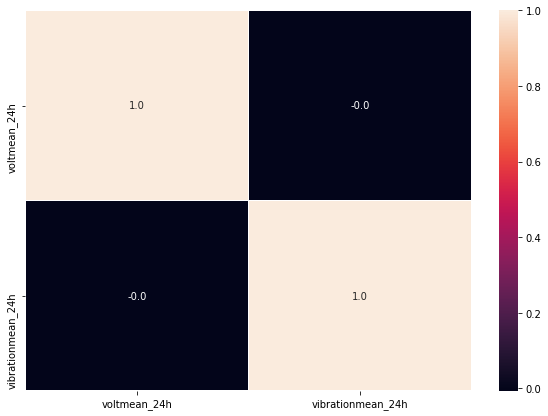

In [13]:
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(volt24_vibration24.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

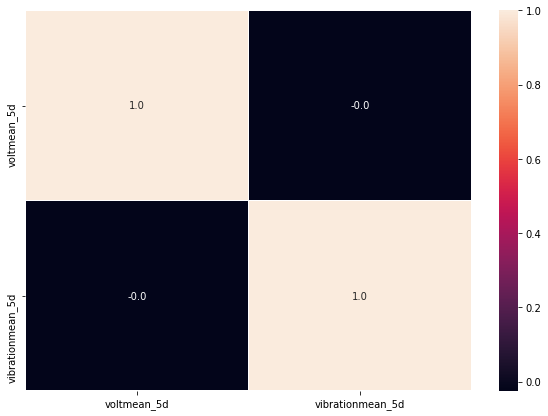

In [14]:
# correlaçao entre Volt 24h e vibraçao 24h

volt5_vibration5 = train_data[['voltmean_5d','vibrationmean_5d']]
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(volt5_vibration5.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

       rotatemean_24h  vibrationmean_24h
0          454.614348          41.506930
1          444.337772          41.702771
2          446.126781          39.281983
3          466.884090          38.571482
4          455.695551          39.789390
...               ...                ...
20862      443.320475          39.556574
20863      463.537218          40.040140
20864      376.676980          42.700168
20865      361.745122          41.407176
20866      437.589364          40.743044

[20867 rows x 2 columns]


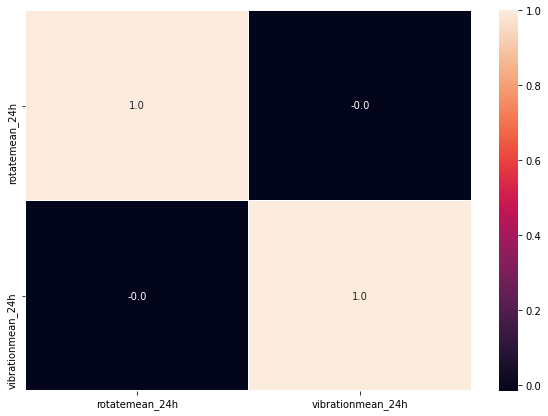

In [16]:
# correlaçao entre Volt 24h e vibraçao 24h

rotate_24_vibration24 = train_data[['rotatemean_24h','vibrationmean_24h']]
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(rotate_24_vibration24.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
print(rotate_24_vibration24)

In [11]:

data_rotate = train_data[['time_in_cycles','rotatemean_24h','rotatemean_5d']]
print(data_rotate)
data_vibracao = train_data[['time_in_cycles','vibrationmean_24h','vibrationmean_5d']]
print(data_vibracao)

       time_in_cycles  rotatemean_24h  rotatemean_5d
0                   2      454.614348     452.843541
1                   3      444.337772     452.344562
2                   4      446.126781     449.728970
3                   5      466.884090     453.357148
4                   6      455.695551     453.531708
...               ...             ...            ...
20862             335      443.320475     445.857269
20863             336      463.537218     450.521585
20864             337      376.676980     435.313050
20865             338      361.745122     417.363874
20866             339      437.589364     416.573832

[20867 rows x 3 columns]
       time_in_cycles  vibrationmean_24h  vibrationmean_5d
0                   2          41.506930         44.874649
1                   3          41.702771         45.360874
2                   4          39.281983         43.602453
3                   5          38.571482         40.878696
4                   6          39.789390   

# Seleçao de Features 
*Usando Random Forest*   
Para este caso nao teremos em consideraçao o DI 

In [34]:
#
# Load the data
url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
train_data = pd.read_csv(url,delimiter=r",")
#print(train_data)

model_mapping  ={'model1': 1, 'model2': 2, 'model3': 3, 'model4': 4}
train_data = train_data.replace({'model': model_mapping})

failure_mapping = {'none': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}
train_data = train_data.replace({'failure': failure_mapping})

# remover colunas
train_data = train_data.drop('datetime',axis=1)

train_data = train_data.astype('float32')
#troca ordem
#RUL_data = train_data.pop("RUL")

#train_data.insert(2, RUL_data.name,RUL_data)
#print(train_data)


n_features = 31
n_target = 35
target = 'RUL_I'

feature_list = [train_data.columns[i] for i in range(0,n_features)]

X_train = train_data.iloc[:, 0:n_features].values.astype('float32')

# generate labels
Y_train = train_data.iloc[:, n_target-1:n_target].values.astype('float32').ravel()



###################
#      TEST       #
###################

#https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv

url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
test_data = pd.read_csv(url,delimiter=r",")

model_mapping  ={'model1': 1, 'model2': 2, 'model3': 3, 'model4': 4}
test_data = test_data.replace({'model': model_mapping})

failure_mapping = {'none': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}
test_data = test_data.replace({'failure': failure_mapping})

# remover colunas
test_data = test_data.drop('datetime',axis=1)

test_data = test_data.astype('float32')


X_test = test_data.iloc[:, 0:n_features].values.astype('float32')
# generate labels
Y_test = test_data.iloc[:, n_target-1:n_target].values.astype('float32').ravel()


In [35]:
##################################
# MODELING
##################################
rf = RandomForestRegressor(n_estimators= 50, criterion = 'mse', random_state=42, verbose = 1)#random_state=42,warm_start=True

# Train the model on training data
rf.fit(X_train, Y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.8s finished


In [37]:
##################################
# TEST DATA
##################################
score = rf.score(X_test, Y_test)

# Use the forest's predict method on the test data
Y_pred = rf.predict(X_test).round()

#KPIs
#Number of features
k = X_test.shape[1]
#No. of data samples
n = len(X_test)

errors = abs(Y_pred - Y_test)
ACC = accuracy_score(Y_test, Y_pred)
RMSE = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred, multioutput='variance_weighted')
adjR2 = 1- ((1-R2)*(n-1))/(n-k-1)

print('\nAccuracy: ',ACC,'%')
print('Average absolute error:', round(np.mean(errors), 2))
print("Root Mean Squared Error (RMSE): ", RMSE)
print("Mean Squared Error (MSE): ", MSE)
print("Mean Absolute Error (MAE): ", MAE)
print("R2_Score: ", R2)
print("Adjusted R2: ", adjR2)
print('Score: ',score.round(2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Accuracy:  0.24603440839603202 %
Average absolute error: 2.07
Root Mean Squared Error (RMSE):  3.239
Mean Squared Error (MSE):  10.492979345377869
Mean Absolute Error (MAE):  2.066851967220971
R2_Score:  0.9935475424006507
Adjusted R2:  0.993537941911782
Score:  0.99


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


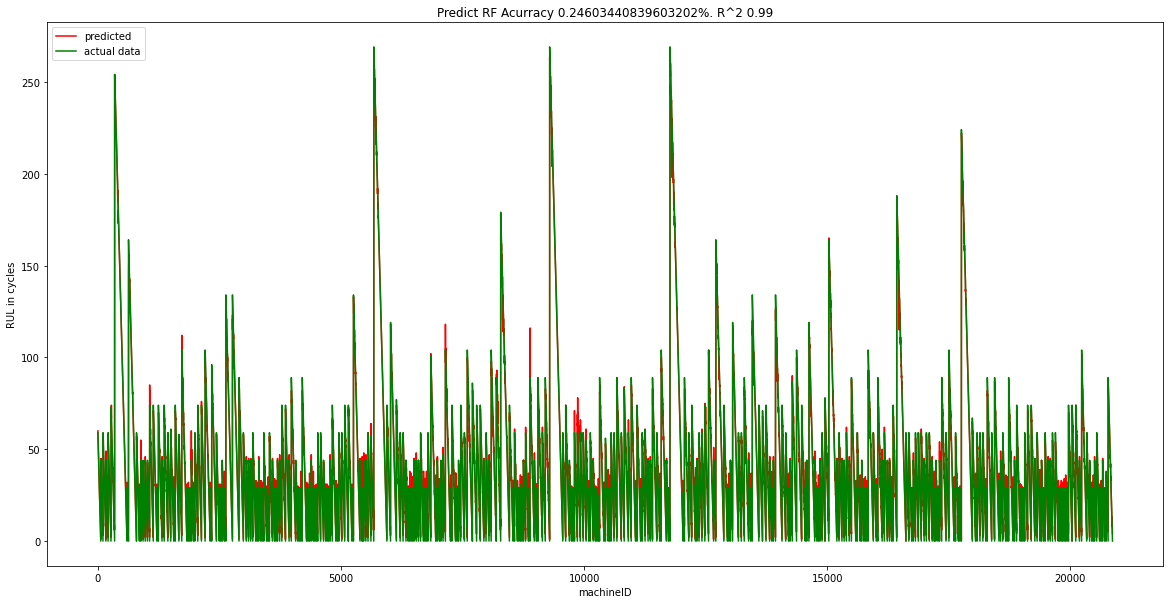

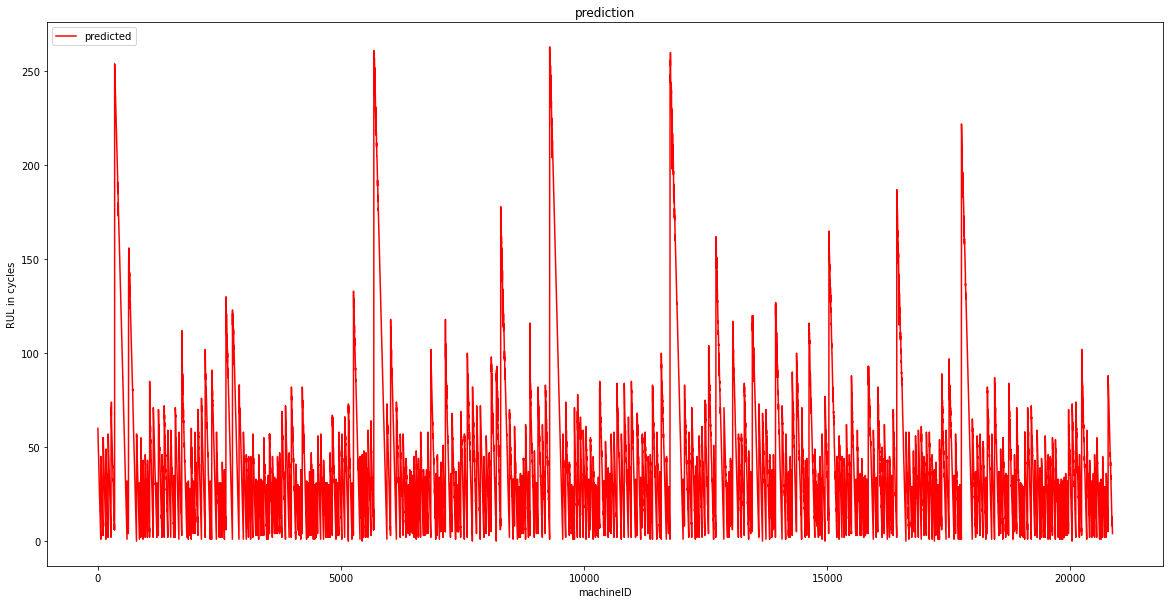

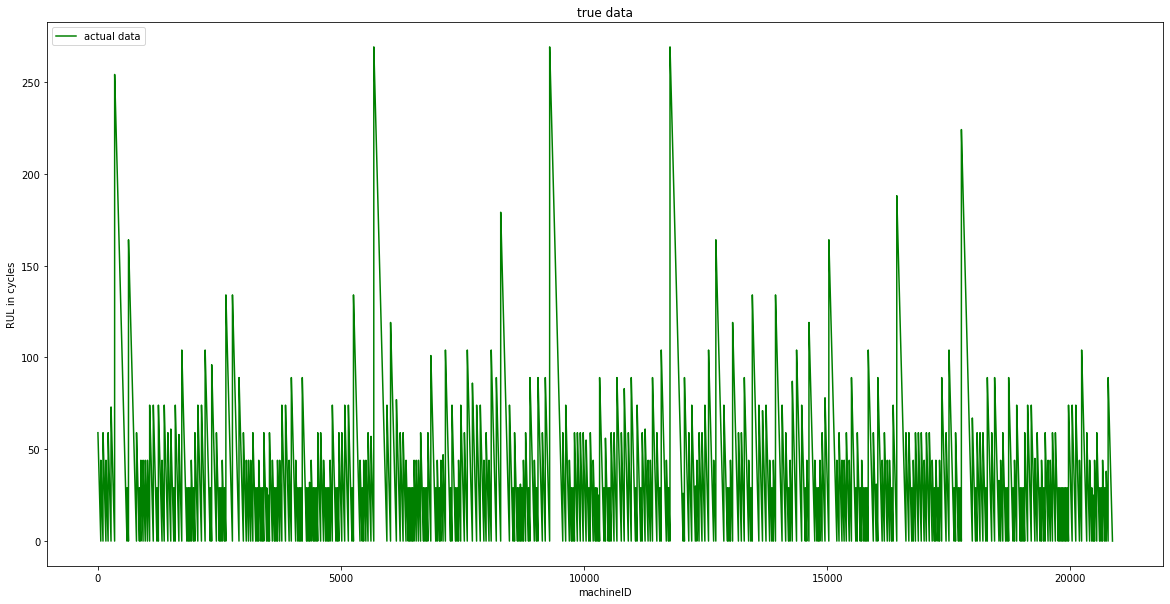

In [38]:
# Plot in blue color the predicted data and in green color the
# actual data to verify visually the accuracy of the model.
plt_title = 'Predict RF Acurracy '+str(ACC)+'%. R^2 '+str(round(R2,2))
fig_verify = plt.figure(figsize=(20, 10))
plt.plot(Y_pred, color="red")
plt.plot(Y_test, color="green")
plt.title('prediction')
plt.ylabel('RUL in cycles')
plt.xlabel('machineID')
plt.legend(['predicted', 'actual data'], loc='upper left')
plt.title(plt_title)
plt.show()

fig_verify = plt.figure(figsize=(20, 10))
plt.plot(Y_pred, color="red")
plt.title('prediction')
plt.ylabel('RUL in cycles')
plt.xlabel('machineID')
plt.legend(['predicted'], loc='upper left')
plt.show()
#fig_verify.savefig("Output/model_regression_verifyRF_pred.png")

fig_verify = plt.figure(figsize=(20, 10))
plt.plot(Y_test, color="green")
plt.title('true data')
plt.ylabel('RUL in cycles')
plt.xlabel('machineID')
plt.legend(['actual data'], loc='upper left')
plt.show()

In [39]:
##################################
# FETURES IMPORTANCES
##################################

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: DI                   Importance: 0.2244
Feature: time_in_cycles       Importance: 0.2054
Feature: machineID            Importance: 0.1606
Feature: RULWeek              Importance: 0.1263
Feature: age                  Importance: 0.1159
Feature: model                Importance: 0.0717
Feature: pressuresd_5d        Importance: 0.013
Feature: voltmean_5d          Importance: 0.0096
Feature: rotatesd_5d          Importance: 0.0092
Feature: pressuremean_5d      Importance: 0.009
Feature: rotatemean_5d        Importance: 0.0089
Feature: voltsd_5d            Importance: 0.0085
Feature: vibrationsd_5d       Importance: 0.0084
Feature: vibrationmean_5d     Importance: 0.0073
Feature: voltsd_24h           Importance: 0.0028
Feature: rotatemean_24h       Importance: 0.0027
Feature: pressuremean_24h     Importance: 0.0026
Feature: vibrationmean_24h    Importance: 0.0026
Feature: voltmean_24h         Importance: 0.0025
Feature: rotatesd_24h         Importance: 0.0025
Feature: pressuresd_24

In [26]:
##################################
MAXLIFE = 15

def Piecewise(cycle_list, max_cycle):
    '''
    Piecewise linear function with zero gradient and unit gradient
            ^
            |
    MAXLIFE |-----------
            |            \
            |             \
            |              \
            |               \
            |                \
            |----------------------->
    '''
    #print(max(cycle_list))
    knee_point = max_cycle - MAXLIFE
    Piecewise_RUL = []
    stable_life = MAXLIFE
    for i in range(0, len(cycle_list)):
        if i < knee_point:
            Piecewise_RUL.append(MAXLIFE)
        else:
            tmp = Piecewise_RUL[i - 1] - (stable_life / (max_cycle - knee_point))
            Piecewise_RUL.append(tmp)

    return Piecewise_RUL

def Apply_Piecewise(lf_dataset):    
    lf_piecewise = []        
    for id in lf_dataset['machineID'].unique():
        for i in lf_dataset.loc[(lf_dataset['machineID']==id)
                              & (lf_dataset['failed'] == 1)].index:
            tam = int(lf_dataset[lf_dataset.index==i]['RUL'])
            i_ini = i - tam + 1
            lf_piecewise.extend(Piecewise(lf_dataset.loc[(lf_dataset.index>=i_ini)&(lf_dataset.index<=i)]['RUL'].values,tam))
    return lf_piecewise  

In [40]:
from sklearn.preprocessing import MinMaxScaler

num_cols = train_data.columns[train_data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

trans = MinMaxScaler()
# normaliza train
train_data[num_cols] = trans.fit_transform(train_data[num_cols])

#normaliza test
test_data[num_cols] = trans.fit_transform(test_data[num_cols])

## Remove features
train_useless_features = train_data[['DI','RUL']]
train_data = train_data.drop(['DI','RUL'],axis=1)

train_RUL_I = train_data["RUL_I"]
train_data = train_data.drop("RUL_I",axis=1)

test_useless_features = test_data[['DI','RUL']]
test_data = test_data.drop(['DI','RUL'],axis=1)

test_RUL_I = test_data["RUL_I"]
test_data = test_data.drop("RUL_I",axis=1)







In [41]:
from sklearn.model_selection import train_test_split
# split the dataset in evaluation and test set
X_eva, X_test, Y_eva, Y_test = train_test_split(test_data, test_RUL_I, test_size=0.77, random_state=42)
print("Number of samples for evaluation: %d, Number of features used: %d " % (X_eva.shape[0], X_eva.shape[1])) 
print("Number of samples for testing: %d, Number of features used: %d " % (X_test.shape[0], X_test.shape[1])) 


Number of samples for evaluation: 4799, Number of features used: 32 
Number of samples for testing: 16068, Number of features used: 32 


In [42]:
# create a sequential model using tensor flow; 
# Another way, is a functional model.
# add layers to the sequential model
Telemetry_Vibration_NN = tf.keras.models.Sequential()
# Input Layer: feed it with a tensor of size (30,1) 
Telemetry_Vibration_NN.add(layers.Input(shape = (32,))) 
# Hidden Layer : It is composed by 15 neurons
Telemetry_Vibration_NN.add(layers.Dense(16) )
# Output Layer: 2 neurons, each one computes a probability of a particular classe
Telemetry_Vibration_NN.add(layers.Dense(1, activation = "softmax")) 
# display a summary of the model's topology and the parameters that need to be trained.
Telemetry_Vibration_NN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Configure the model for training stage.
Telemetry_Vibration_NN.compile(optimizer="adam", loss="mean_squared_error", metrics=['acc'])

In [44]:
#Train the model; using the fit function.
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
historic_data = Telemetry_Vibration_NN.fit(train_data, Y_train, batch_size = 40, epochs= 25, validation_split = 0.20 )

Epoch 1/25
418/418 [==============================] - 1s 2ms/step - loss: 3329.8204 - acc: 0.0164 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 2/25
418/418 [==============================] - 1s 1ms/step - loss: 3399.8876 - acc: 0.0165 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 3/25
418/418 [==============================] - 1s 2ms/step - loss: 3383.5344 - acc: 0.0161 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 4/25
418/418 [==============================] - 1s 1ms/step - loss: 3375.4604 - acc: 0.0162 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 5/25
418/418 [==============================] - 1s 1ms/step - loss: 3421.6264 - acc: 0.0153 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 6/25
418/418 [==============================] - 1s 1ms/step - loss: 3410.6877 - acc: 0.0165 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 7/25
418/418 [==============================] - 1s 1ms/step - loss: 3372.0546 - acc: 0.0161 - val_loss: 2027.0309 - val_acc: 0.0192
Epoch 8/25
418/418 [==============

In [45]:
# visualize the weights at the end of the training process
print(Telemetry_Vibration_NN.get_weights())

[array([[ 0.073,  0.229,  0.228,  0.066,  0.046,  0.207,  0.129, -0.3  ,
         0.321,  0.11 , -0.218, -0.099,  0.207, -0.317,  0.249, -0.282],
       [ 0.097, -0.27 ,  0.207,  0.028, -0.331, -0.123,  0.321, -0.219,
        -0.15 , -0.228,  0.257,  0.039,  0.302,  0.092,  0.307, -0.159],
       [-0.075,  0.299,  0.343, -0.313, -0.157,  0.351, -0.242, -0.319,
         0.262,  0.314, -0.335,  0.056, -0.058, -0.23 , -0.086,  0.01 ],
       [-0.115,  0.334,  0.249, -0.272,  0.083,  0.05 ,  0.08 ,  0.023,
         0.305, -0.135, -0.17 , -0.288,  0.281, -0.117,  0.253,  0.158],
       [-0.183,  0.116,  0.19 ,  0.249, -0.17 , -0.004,  0.058,  0.07 ,
         0.179, -0.11 , -0.184, -0.036,  0.256, -0.15 , -0.314, -0.073],
       [ 0.051,  0.317, -0.29 , -0.207,  0.281,  0.072,  0.222,  0.271,
        -0.073,  0.04 ,  0.024,  0.293, -0.045,  0.169, -0.277, -0.043],
       [-0.273,  0.328, -0.194,  0.187,  0.328, -0.105,  0.086, -0.211,
        -0.016, -0.024, -0.209,  0.027, -0.286, -0.266, -

In [47]:
# Generate predictions in the test data; Using the trained Neural Network
# Apply the argmax to extract the most likely classe for each instance
Y_pred = np.argmax(Telemetry_Vibration_NN.predict(X_test), axis = 1)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [49]:
Y_true = np.argmax(Y_test, axis = 0) 
print(Y_true)

9260


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# measure the accuracy of the model in the testing data
confusao_matrix = confusion_matrix(Y_true, Y_pred )
accuracy = np.sum(confusao_matrix.diagonal())/ np.sum(np.sum(confusao_matrix))
print(accuracy)

TypeError: ignored